In [ ]:
# import necessary libraries
import pandas as pd
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
from numpy import arange
warnings.simplefilter('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#. import the data and view a preview
data = pd.read_csv('/content/drive/MyDrive/Project Work/dataset (1).csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


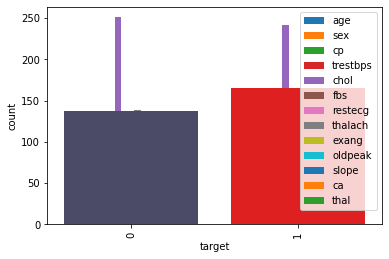

In [ ]:
#. group by target and get the mean of from sklearn.model_selection import GridSearchCVeach feature
tar = data.groupby('target')
tar.agg('mean').plot(kind='bar')
ui = ['#47476b','#ff0000']
sns.set_palette(ui)
sns.countplot(data['target'])
plt.show()
sns.set_palette(sns.color_palette("Paired"))

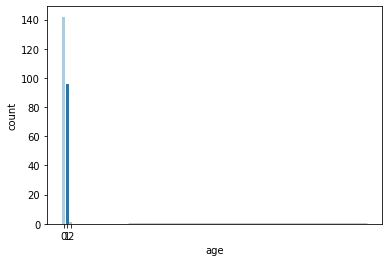

<Figure size 3240x3240 with 0 Axes>

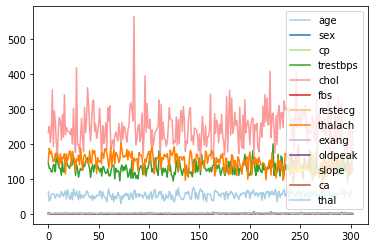

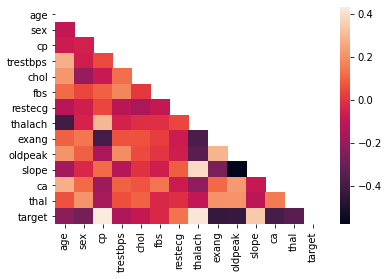

In [ ]:
#. get the confirmed cases
cases = data.query('target == 1')
sns.countplot(cases['sex'])
sns.countplot(cases['exang'])
sns.countplot(cases['restecg'])
np.mean(cases['age'])
np.std(cases['age'])
sns.distplot(cases['age'])
plt.show()

X = data.drop(columns=['target'])
Y = data['target']
plt.figure(figsize=(45,45))
X.plot()
plt.show()

corr = data.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
sns.heatmap(corr,mask=mask)
plt.show()

In [ ]:
def find_optimal_params(model,params):
  """
  Get Optimal Parameters for a model

  :param Model: Machine Learning model
  :param Params: Altering params and ranges 

  :return: a json of params and their optimal value 

  """
  grid = GridSearchCV(model,param_grid=params)
  grid.fit(X_train,y_train)
  return grid.best_params_
features = SelectKBest(chi2,k=7)
features.fit(X,Y)
X.columns[features.get_support()]

Index(['age', 'cp', 'chol', 'thalach', 'exang', 'oldpeak', 'ca'], dtype='object')

In [ ]:
#.  keep track of the information
models = []
scores = []
X_train,x_test,y_train,y_test = train_test_split(X,Y)

KNeighborsClassifier Accuracy: 0.618421052631579
[[20 15]
 [14 27]]
KNeighborsClassifier classification report
              precision    recall  f1-score   support

           0       0.59      0.57      0.58        35
           1       0.64      0.66      0.65        41

    accuracy                           0.62        76
   macro avg       0.62      0.61      0.62        76
weighted avg       0.62      0.62      0.62        76



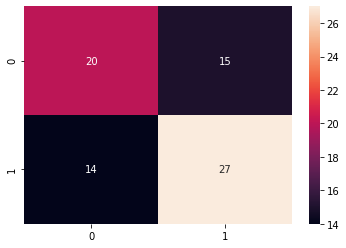

In [ ]:
#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
#Create KNN Classifier
model = KNeighborsClassifier(n_neighbors=5)
model.fit(x_test,y_test)
predicted = model.predict(x_test)
# Model Accuracy, how often is the classifier correct?
print("KNeighborsClassifier Accuracy:",metrics.accuracy_score(y_test,predicted))
print(confusion_matrix(y_test,predicted))
print("KNeighborsClassifier classification report")
print(classification_report(y_test,predicted))
sns.heatmap(confusion_matrix(y_test,predicted),annot = True)
plt.show()

In [ ]:
print("Cross Validation Score\n")
np.average(cross_val_score(KNeighborsClassifier (n_neighbors=5),X,Y))

Cross Validation Score



0.643879781420765

In [ ]:
# Create Decision Tree classifer object
model = DecisionTreeClassifier()

# Train Decision Tree Classifer
model.fit(x_test,y_test)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

 DecisionTreeClassifier Accuracy: 1.0

		 DecisionTreeClassifier Classification Report

[[35  0]
 [ 0 41]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       1.00      1.00      1.00        41

    accuracy                           1.00        76
   macro avg       1.00      1.00      1.00        76
weighted avg       1.00      1.00      1.00        76



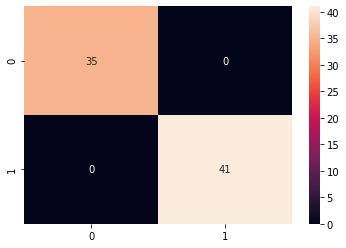

Cross Validation Score



0.7423497267759563

In [ ]:
#Predict the response for test dataset
predicted = model.predict(x_test)
# Model Accuracy, how often is the classifier correct?
print(" DecisionTreeClassifier Accuracy:",metrics.accuracy_score(y_test,predicted))
print("\n\t\t DecisionTreeClassifier Classification Report\n")
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test,predicted))
print(classification_report(y_test,predicted))
sns.heatmap(confusion_matrix(y_test,predicted),annot = True, fmt = "d")
plt.show()
print("Cross Validation Score\n")
np.average(cross_val_score(DecisionTreeClassifier(),X,Y))

Finding the optimal params for the C param for the SVC model 

Optimal Param for C = 70
SVC Classifier Accuracy: 0.618421052631579
[[21 14]
 [15 26]]
              precision    recall  f1-score   support

           0       0.58      0.60      0.59        35
           1       0.65      0.63      0.64        41

    accuracy                           0.62        76
   macro avg       0.62      0.62      0.62        76
weighted avg       0.62      0.62      0.62        76



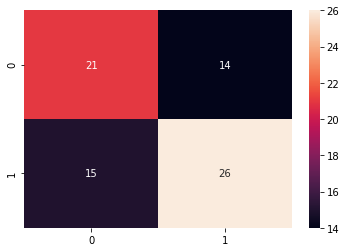

Cross Validation Score

Finding the optimal params for the n_estimators param for the RandomForestClassifier model 

Optimal Param for n_estimators = 10


In [ ]:
print("Finding the optimal params for the C param for the SVC model ")
 #. find the optimal param with a predefined function
optimal_param = find_optimal_params(SVC(kernel='rbf'),{'C':range(0,110,5)})['C']
print("\nOptimal Param for C =",optimal_param)

model = SVC(C = 90,kernel='rbf').fit(X_train,y_train)
test_score = model.score(x_test,y_test)
scores.append(test_score)
predicted = model.predict(x_test)
print("SVC Classifier Accuracy:",metrics.accuracy_score(y_test,predicted))
print(confusion_matrix(y_test,predicted))
print(classification_report(y_test,predicted))
sns.heatmap(confusion_matrix(y_test,predicted),annot=True)
plt.show()

print("Cross Validation Score\n")
np.average(cross_val_score(SVC(C = 90),X,Y))

print("Finding the optimal params for the n_estimators param for the RandomForestClassifier model ")
optimal_param = find_optimal_params(RandomForestClassifier(),{'n_estimators':range(0,20,5)})['n_estimators']
print("\nOptimal Param for n_estimators =",optimal_param)

RandomForestClassifier Accuracy: 0.8026315789473685
[[25 10]
 [ 5 36]]

		RandomForestClassification Report

              precision    recall  f1-score   support

           0       0.83      0.71      0.77        35
           1       0.78      0.88      0.83        41

    accuracy                           0.80        76
   macro avg       0.81      0.80      0.80        76
weighted avg       0.81      0.80      0.80        76



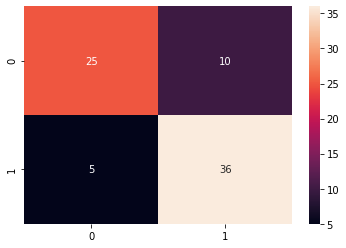

Cross Validation Score

Finding the optimal params for the n_estimators param for the GradientBoostingClassifier model 

Optimal Param for n_estimators = {'learning_rate': 0.2, 'n_estimators': 1}
 GradientBoostingClassifier Accuracy: 0.5394736842105263
[[ 0 35]
 [ 0 41]]

		GradientBoostingClassification Report

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        35
           1       0.54      1.00      0.70        41

    accuracy                           0.54        76
   macro avg       0.27      0.50      0.35        76
weighted avg       0.29      0.54      0.38        76



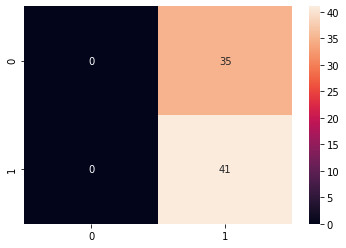

In [ ]:
model = RandomForestClassifier(n_estimators=15).fit(X_train,y_train)
scores.append(model.score(x_test,y_test))
predicted = model.predict(x_test)
print("RandomForestClassifier Accuracy:",metrics.accuracy_score(y_test,predicted))
print(confusion_matrix(y_test,predicted))
print("\n\t\tRandomForestClassification Report\n")
print(classification_report(y_test,predicted))
sns.heatmap(confusion_matrix(y_test,predicted),annot=True)
plt.show()
print("Cross Validation Score\n")
np.average(cross_val_score(RandomForestClassifier(n_estimators=15),X,Y))

print("Finding the optimal params for the n_estimators param for the GradientBoostingClassifier model ")
optimal_param = find_optimal_params(GradientBoostingClassifier(),{'learning_rate':arange(0.01,1,0.01),'n_estimators':range(1,5,50)})
print("\nOptimal Param for n_estimators =",optimal_param)

model = GradientBoostingClassifier(learning_rate=0.01,n_estimators=1).fit(X_train,y_train)
scores.append(model.score(x_test,y_test))
predicted = model.predict(x_test)
print(" GradientBoostingClassifier Accuracy:",metrics.accuracy_score(y_test,predicted))
print(confusion_matrix(y_test,predicted)) 
print("\n\t\tGradientBoostingClassification Report\n")
print(classification_report(y_test,predicted))
sns.heatmap(confusion_matrix(y_test,predicted),annot = True)
plt.show()


In [ ]:
print("Cross Validation Score\n")
np.average(cross_val_score(GradientBoostingClassifier(learning_rate=0.01,n_estimators=1),X,Y))

Cross Validation Score



0.5445901639344262